Code for cuda CNN


Mounts the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import statements

In [ ]:

import numpy as np 
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import keras
import torch as th
import torchvision
import torchvision.transforms as transforms
th.manual_seed(42)
import time 
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras import regularizers
tf.set_random_seed(2)
print(tf.__version__)
np.random.seed(5)
tf.set_random_seed(2)
start_time = time.time()

1.15.2


Turning on Cuda and making CudNN as our backend library

In [ ]:
if th.cuda.is_available():
  # Make CuDNN Determinist
  th.backends.cudnn.deterministic = True
  th.cuda.manual_seed(42)
  print("GPU is available and turned on")
device = th.device("cuda" if th.cuda.is_available() else "cpu")

GPU is available and turned on


Setting the Two Directories

In [ ]:

train_set = "/content/drive/MyDrive/asl_alphabet_train"
eval_set = "/content/drive/MyDrive/asl-alphabet-test"

Loading the data 

In [ ]:
def load_data():
  images= []
  labels = []
  size = 64,64
  print ("Loading ", end = "")
  for folder_index, folder in enumerate(os.listdir(train_set)):
    print(folder,end='|')
    for image in os.listdir(train_set + "/"+folder):
      temp_img = cv2.imread(train_set + '/' + folder + '/' + image)
      temp_img = cv2.resize(temp_img, size)
      images.append(temp_img)
      labels.append(folder_index)
  images= np.array(images)
  images = images.astype('float32')/255.0  #normalize the RGB values
  labels = keras.utils.to_categorical(labels) # one hot encoding
  X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.1)
  # print()
  # print(len(labels))
  # print(len(images))
  # print(len(X_train))
  # print(len(X_test))
  # print(len(Y_train))
  # print(len(Y_test))
  return X_train, X_test, Y_train, Y_test, labels

Setting our data for training and testing

In [ ]:
x_train, x_test, y_train, y_test, Labels = load_data()

Loading I|F|B|C|G|H|D|E|del|A|Q|K|N|R|O|M|P|nothing|J|L|space|V|Y|T|S|Z|U|W|X|

Print function for our images


In [ ]:
def print_images(image_list):
    n = len(image_list)
    cols = 8
    rows = 4
    fig = plt.figure(figsize = (24, 12))
    
    for i in range(29):
      ax = plt.subplot(rows,cols, i+1)
      plt.imshow(image_list[i])
      # plt.title(Labels[i])
      ax.title.set_fontsize(20)
      ax.axis('off')
    plt.show()


Training model

In [ ]:
model = Sequential()
model.add(Conv2D(filters=5, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(filters=15, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(29, activation='softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 5)         380       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 15)        1890      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 240)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                6989      
Total params: 9,259
Trainable params: 

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)


Train on 2088 samples, validate on 522 samples
Epoch 1/10
2088/2088 [==============================] - 7s 3ms/step - loss: 3.1921 - accuracy: 0.1547 - val_loss: 2.8940 - val_accuracy: 0.2299
Epoch 2/10
2088/2088 [==============================] - 0s 170us/step - loss: 2.1702 - accuracy: 0.4914 - val_loss: 1.6704 - val_accuracy: 0.5479
Epoch 3/10
2088/2088 [==============================] - 0s 163us/step - loss: 1.2749 - accuracy: 0.6753 - val_loss: 1.1290 - val_accuracy: 0.7011
Epoch 4/10
2088/2088 [==============================] - 0s 169us/step - loss: 0.8311 - accuracy: 0.7816 - val_loss: 0.8578 - val_accuracy: 0.7011
Epoch 5/10
2088/2088 [==============================] - 0s 169us/step - loss: 0.5691 - accuracy: 0.8472 - val_loss: 0.7060 - val_accuracy: 0.7682
Epoch 6/10
2088/2088 [==============================] - 0s 163us/step - loss: 0.4032 - accuracy: 0.8946 - val_loss: 0.3868 - val_accuracy: 0.9023
Epoch 7/10
2088/2088 [==============================] - 0s 174us/step - loss: 

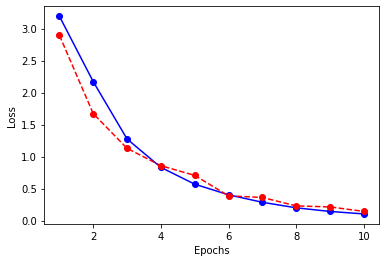

In [ ]:
hist = model.history
epochs = range(1, len(hist.history['loss']) + 1)
plt.plot(epochs, hist.history['loss'], 'bo-')
plt.plot(epochs, hist.history['val_loss'], 'ro--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
score = model.evaluate(x=x_test, y=y_test,verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9551724195480347


In [ ]:
Total_time = time.time()-start_time
print("Total _runtime", Total_time)

Total _runtime 720.4243948459625


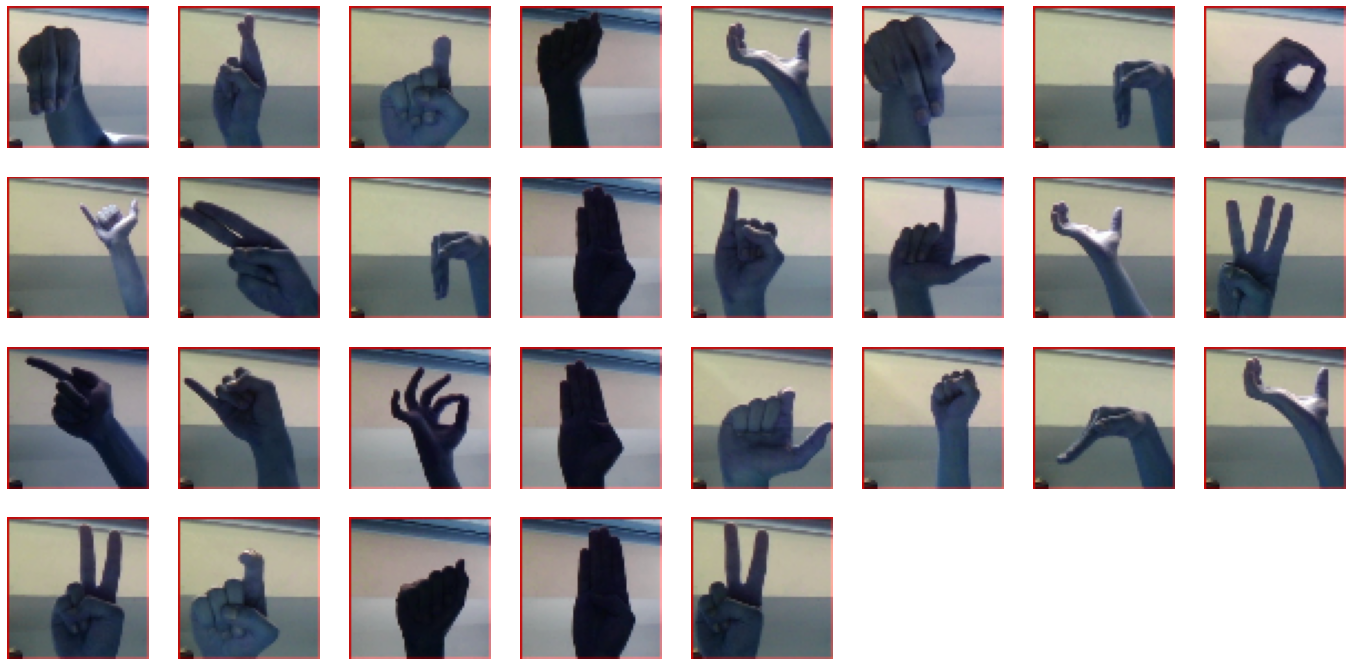

In [ ]:
print_images(x_train)

If you want to test the code with you image and see the result you have to pick the address and put it instead if the address we have in eval_set.
But please put it in a folder which is showing its right class.This will not effect the predicting but after predicting you can see whether it is working right or not. 

In [ ]:
def load_testdata():
  images= []
  labels = []
  size = 64,64
  print ("Loading ", end = "")
  for folder_index, folder in enumerate(os.listdir(eval_set)):
    print(folder,end='|')
    for image in os.listdir(eval_set + "/"+folder):
      temp_img = cv2.imread(eval_set + '/' + folder + '/' + image)
      temp_img = cv2.resize(temp_img, size)
      images.append(temp_img)
      labels.append(folder_index)
  images= np.array(images)
  images = images.astype('float32')/255.0  #normalize the RGB values
  labels = keras.utils.to_categorical(labels) # one hot encoding
  return images,labels

Here we load the pictures for your test.

In [ ]:
images,labels=load_testdata()

Loading H|C|F|D|A|E|I|B|G|del|N|Q|nothing|R|O|J|K|P|M|L|T|U|V|Y|W|space|X|Z|S|

In [ ]:
predicted_classes = model.predict_classes(images)
print("The number of the class in which the pictuter belong is")
print(predicted_classes)

The number of the class in which the pictuter bilong is
[ 4  1 16 16 16  5 16  4 14 16 15 16 15 16 16 16  1 14 25 16 16 16 16 16
  1 17 24  4  9 16  1 15 15  5 15  5  5  4  1 16 15  4  5 15 15  5  5  5
  5  1  9  3 10  2 16  4 15 15  4  3 16 12 10 16 10 16 16 16 10 10  3 10
 16 16  1 16 10  3 24 10 16 16 16 16 10 16 16 17  3 16  5 16 24  1 10 26
 16 14  1 24 16 16 10 16  1  6  1 16 16 16 10  3 23 16  5  1 16  5  1 10
 15 15 12 15  5  5 12  4  2  2 15  9 15 16 15  2 12 16 15  2  4 14  4  4
 16 15 15  1 15 15 16 16 16 10 16 16 10 10 16 10 24  1 15 10  5  5 10 10
 16 10  5 16  9 10 16 10 16 10 10 16 15 15 15 15 16 16 14 14 16  5 14  6
 16 15 25 19 14 16 16 24 14  7 14 14 19 26  7 16  4 14  2 15  9 15 10 15
 16 15  1  1 15 16  1  2  1 15 14  4  2 14 15 25 14 16  2 14 15 14 15  1
  3 16 24 16 16 24 16 16 14 16 16 16 16  5 16 24  6 24 16 16  5 16  3 15
 16 16 25 16 16 16  5 14 20 16 10 15 24 14 15 24 24 16 16 14 24 16 16  2
 14 14 14 16 15  5 15 16  3 16  5  3 17 17 17  5 17 14 17  5 15 14 1